In [4]:
# Importing the required module
# TODO: Use other plotting library instead?
# TODO: Check which libraries remain relevant at the end.
import numpy as np

import pandas as pd


import matplotlib.pyplot as plt

import plotly.express as px


In [5]:
# Set parameters
T=100

#Generate timeline

t = np.arange(0,T,1,dtype=int)

# Set std and switching probability

var_errors = 30
p = 0.5

# Generate (stochastic) trend:

seed = 12345

rng = np.random.default_rng(seed)
draw_rand_bin = rng.binomial(1, p, size=None)

errors = rng.normal(0, var_errors, T)




# Set the trend component
c = .5

# Generate trend shift (first up, then down, or vice versa)

trend = np.array([0,0])

if draw_rand_bin == 0:
    trend = np.array([c,-c])
elif draw_rand_bin == 1:
    trend = np.array([c,-c])    


# Determine whether there is a trend shift
# For shift at t=0, this is equivalent to no shift (i.e., second part of trend is used throughout).

# Set up shifting probabilities
p_shift_at_0 = 0.5

equal_prob_t80= (1-  p_shift_at_0) / (79)

p_shift_at_t = np.full(80, equal_prob_t80)


p_shift_at_t[0] = p_shift_at_0

p_shift_at_t

check_sum = np.sum(p_shift_at_t)
# check_sum

In [6]:
trend_shift = np.random.choice(80, size=None, replace=True, p=p_shift_at_t.tolist())

# trend_shift

In [7]:

trend_shift = np.random.choice(80, size=None, replace=True)

trend_shift

# generate trend vector including shift

trend_with_shift = np.full(100,c)
for i in range(0,100):
    if i <= trend_shift:
        trend_with_shift[i] = trend[0]
    elif i > trend_shift:
        trend_with_shift[i] = trend[1]

trend_with_shift


# run cumulative trend, errors

cum_sum_trend = np.cumsum(trend_with_shift)

cum_sum_errors = np.cumsum(errors)

y = cum_sum_trend + cum_sum_errors





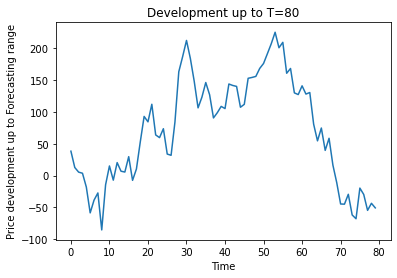

In [8]:


# TODO: Get good handle on plotting.
# Currently using matplotlib


 
# plotting the points
plt.plot(t[0:80], y[0:80])
 
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Price development up to Forecasting range')
 
# giving a title to my graph
plt.title('Development up to T=80')
 
# function to show the plot
plt.show()

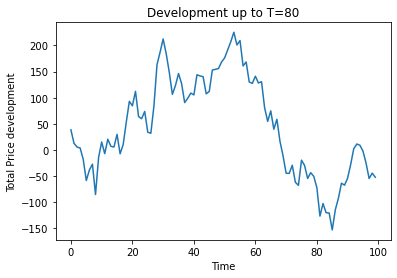

In [9]:
# plotting the points
plt.plot(t[0:100], y[0:100])
 
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Total Price development')
 
# giving a title to my graph
plt.title('Development up to T=80')
 
# function to show the plot
plt.show()

In [20]:
#t.shape
# y.shape

# combined_array = np.concatenate((t, y),axis=0, out=None, dtype=None, casting="same_kind")

# combined_array.shape

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
# TODO: draw in regressions.
# Isn't it better to use plotly?
# Learn basics w/ plotly.



df = pd.DataFrame()


reg_plot = px.scatter(data, x="number_obs", 
                        y="runtime", 
                        trendline="ols",
                        labels={'number_obs':'Number of Observations', 'runtime':'runtime'},
                        trendline_color_override="red",
                        title='Relationship Between number of observations and runtime',
                        )